In [1]:
import numpy as np
import itertools
import imghdr
import cv2
import os
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import matplotlib.pyplot as plt

# train

In [2]:
print(tf.__version__)

2.9.1


In [4]:
data = tf.keras.utils.image_dataset_from_directory(r'D:\datasetpicture\picture\traindata\\')

Found 826 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

In [7]:
len(batch)

2

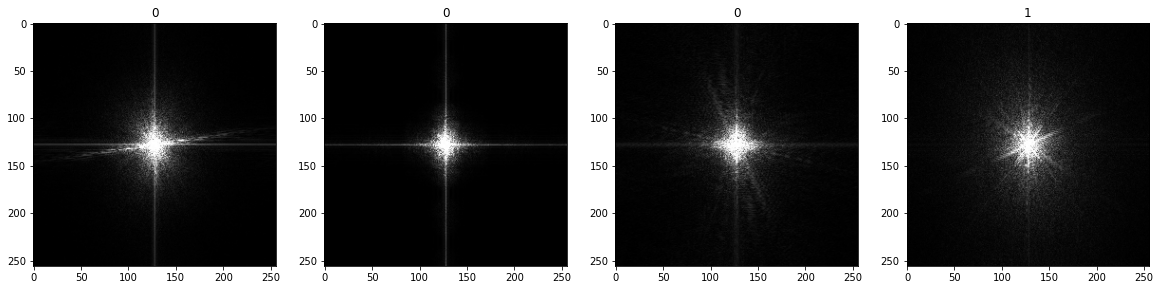

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.00955882, 0.00955882, 0.00955882],
          [0.0122549 , 0.0122549 , 0.0122549 ],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.02156863, 0.02156863, 0.02156863],
          [0.01691177, 0.01691177, 0.01691177],
          [0.01470588, 0.01470588, 0.01470588]],
 
         [[0.0120098 , 0.0120098 , 0.0120098 ],
          [0.01102941, 0.01102941, 0.01102941],
          [0.01102941, 0.01102941, 0.01102941],
          ...,
          [0.00759804, 0.00759804, 0.00759804],
          [0.02181373, 0.02181373, 0.02181373],
          [0.01446078, 0.01446078, 0.01446078]],
 
         [[0.01323529, 0.01323529, 0.01323529],
          [0.02083333, 0.02083333, 0.02083333],
          [0.02328431, 0.02328431, 0.02328431],
          ...,
          [0.01397059, 0.01397059, 0.01397059],
          [0.02720588, 0.02720588, 0.02720588],
          [0.00514706, 0.00514706, 0.00514706]],
 
         ...,
 
         [[0.02426471, 0.02426471, 0.02426471],
          [0.01470

In [11]:
len(data)

26

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

18

In [14]:
val_size

5

In [15]:
test_size

2

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
len(train)

18

In [18]:
len(val)

5

In [19]:
len(test)

2

In [20]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
#y_pred = model.predict(train)

def jaccard(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [21]:
def jaccard_loss(y_true, y_pred):
    return -jaccard(y_true, y_pred)

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [25]:
logdir='C:/testcam/logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])
model.save('my_model.h5')

Epoch 1/30
18/18 [==============================] - 10s 485ms/step - loss: 0.5438 - accuracy: 0.7274 - val_loss: 0.4147 - val_accuracy: 0.7563
Epoch 2/30
18/18 [==============================] - 9s 460ms/step - loss: 0.3041 - accuracy: 0.8872 - val_loss: 0.2121 - val_accuracy: 0.9187
Epoch 3/30
18/18 [==============================] - 9s 469ms/step - loss: 0.2622 - accuracy: 0.8906 - val_loss: 0.2464 - val_accuracy: 0.9062
Epoch 4/30
18/18 [==============================] - 9s 471ms/step - loss: 0.2347 - accuracy: 0.9028 - val_loss: 0.1577 - val_accuracy: 0.9500
Epoch 5/30
18/18 [==============================] - 9s 474ms/step - loss: 0.1604 - accuracy: 0.9306 - val_loss: 0.1710 - val_accuracy: 0.9250
Epoch 6/30
18/18 [==============================] - 9s 474ms/step - loss: 0.1495 - accuracy: 0.9236 - val_loss: 0.1862 - val_accuracy: 0.9438
Epoch 7/30
18/18 [==============================] - 9s 477ms/step - loss: 0.1626 - accuracy: 0.9427 - val_loss: 0.1218 - val_accuracy: 0.9625
Epoch

In [28]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

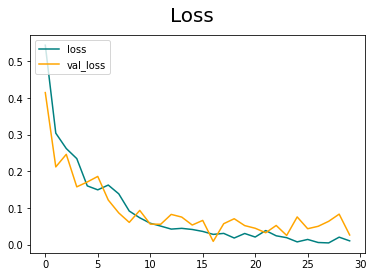

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

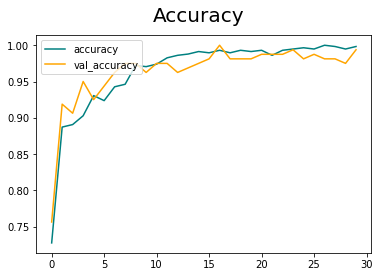

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = new_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 123ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


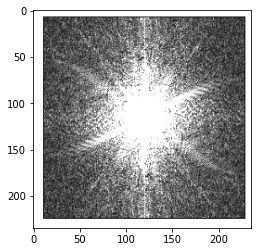

In [35]:
img = cv2.imread('C:/testcam/spec2/spectrumfolder/real/50.png')
plt.imshow(img)
plt.show()

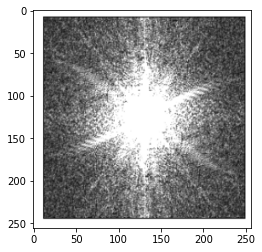

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [38]:
yhat

array([[1.]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')

Predicted class is real


In [35]:
new_model = keras.models.load_model('my_model.h5')

In [99]:
#img = cv2.imread('C:/testcam/spec2/spectrumfolder/real/50.png')
img = cv2.imread('D:/datasetpicture/picture/testdata/fake_fouri/yo_l44.jPG')
resize = tf.image.resize(img, (256,256))
yhat = new_model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat > 0.8: 
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')

1/1 [==============================] - 0s 21ms/step
[[1.6215666e-06]]
Predicted class is fake


TypeError: unsupported operand type(s) for /: 'AxesImage' and 'int'

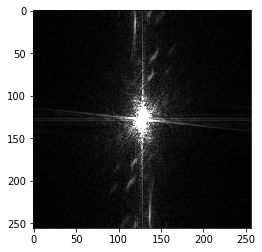

In [47]:
width = 256
imgnor = color.rgb2gray(io.imread('C:/testcam/spec2/testfolder/fake/fa/70.jpg'))
img = cv2.resize(imgnor ,(width,width))

img_FFT = (fftshift(fft2(img)))
img_FFTw = plt.imshow(np.abs(img_FFT), cmap='gray', vmax=200)

#img = cv2.imread('C:/testcam/spec2/testfolder/fake/fake/70.png')
imgre = cv2.imread('img_FFTw')
#resize = tf.image.resize(imgre, (256,256))
yhat = model.predict(np.expand_dims(img_FFTw/255, 0))
print(yhat)
if yhat > 0.8: 
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')

# Fourier Converter

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg 
import sympy as smp
import cv2
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2, fftshift
import os
from os import listdir, remove, mkdir
from os.path import isdir, isfile
from PIL import Image


[[0.45264781 0.42682964 0.42460844 ... 0.28179509 0.26485268 0.27232955]
 [0.42175152 0.41651255 0.41074808 ... 0.28676831 0.27815691 0.27409748]
 [0.41288969 0.40507486 0.40454481 ... 0.31602833 0.35859969 0.31120685]
 ...
 [0.04854706 0.04854706 0.04854706 ... 0.2171327  0.22506775 0.20167542]
 [0.06162917 0.04465613 0.04854706 ... 0.21004783 0.20944275 0.21956483]
 [0.05689709 0.04856591 0.05246863 ... 0.21967299 0.21452593 0.21566299]]


True

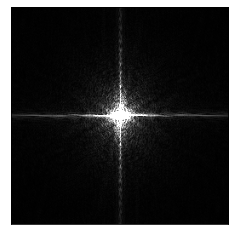

In [50]:
width = 256
imgnor = color.rgb2gray(io.imread('C:/testcam/datatest/fakerepic/170906.jpg'))
img = cv2.resize(imgnor ,(width,width))
#img = color.rgb2gray(io.imread('C:/Users/Windows 10/Downloads/fakerepic/172064.jpg'))
#img_FT = fft2(img)
#fy = np.fft.fftfreq(img.shape[0],d=100) #suppose the spacing between pixels is 10mm, for example
#fx = np.fft.fftfreq(img.shape[1],d=100)
#print('{:.2f} correponds to fx={:.6f} and fy={:.6f}'.format(img_FT[10,20], fx[20], fy[10]))
#plt.imshow(np.abs(img_FT), cmap='gray', vmax=20)
#plt.colorbar()
img_FFT = (fftshift(fft2(img)))
#plt.imshow(np.abs(img_FFT), cmap='gray', vmax=20), plt.xticks([]), plt.yticks([])
print(img)
plt.imshow(np.abs(img_FFT), cmap='gray', vmax=200), plt.xticks([]), plt.yticks([])
cv2.imwrite('C:/testcam/spec2/test2/real/940.jpg', (np.abs(img_FFT)))

(<matplotlib.image.AxesImage at 0x222a7473fd0>, ([], []), ([], []))

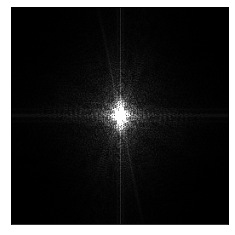

In [3]:
a = plt.imshow(np.abs(img_FFT), cmap='gray', vmax=200), plt.xticks([]), plt.yticks([])

[[ 2.50666719  3.61330386  2.63317877 ...  4.98998804  2.63317877
   3.61330386]
 [ 6.38744633  2.29826064  4.93142286 ...  1.95753589  1.25705472
   4.07021027]
 [ 8.15706116  4.27786172 10.00226352 ...  4.1358895   5.46493641
   4.70407291]
 ...
 [ 4.47596859  2.42535352  7.18121109 ...  4.13497727 10.18314326
   3.45765354]
 [ 8.15706116  4.70407291  5.46493641 ...  1.65221874 10.00226352
   4.27786172]
 [ 6.38744633  4.07021027  1.25705472 ...  3.56175972  4.93142286
   2.29826064]]


In [17]:
def convertpic():
    width = 640
    imgnor = color.rgb2gray(io.imread(a))
    img = cv2.resize(imgnor ,(width,width))
    #img = color.rgb2gray(io.imread('C:/Users/Windows 10/Downloads/fakerepic/172064.jpg'))
    img_FT = fft2(img)
    fy = np.fft.fftfreq(img.shape[0],d=100) #suppose the spacing between pixels is 10mm, for example
    fx = np.fft.fftfreq(img.shape[1],d=100)
    print('{:.2f} correponds to fx={:.6f} and fy={:.6f}'.format(img_FT[10,20], fx[20], fy[10]))
    plt.imshow(np.abs(img_FT), cmap='gray', vmax=200)
    plt.colorbar()
    
    img_FFT = (fftshift(fft2(img)))
    #img_FFT = np.abs(fftshift(fft2(img)))
    plt.imshow(np.abs(img_FFT), cmap='gray', vmax=200)
    plt.colorbar()
    
    img_FT_alt = np.copy(img_FT)
    img_FT_alt[-2:] = 0 
    img_FT_alt[:,-2:] = 0 
    img_FT_alt[:2] = 0 
    img_FT_alt[:,:2] = 0 
    img_alt = np.abs(ifft2(img_FT_alt))
    plt.imshow(img_alt, cmap='gray')
    plt.colorbar()
    
    plt.subplot(121),plt.imshow(cv2.resize((io.imread(a)),(width,width)))
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(np.abs(img_FFT), cmap='gray', vmax=200)
    plt.title('Fourier Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite('C:/testcam/datatest/forpresentation/tshow/fourier/1.jpg', (np.abs(img_FFT)))
    fig = plt.figure()

    ax2 = fig.add_subplot(1, 2, 1)
    ax2.set_title("Input Image")
    ax2.set_xticks([])
    ax2.set_yticks([])
    input_img = mpimg.imread(os.path.join('C:/testcam/datatest/fakerepic', '170906.jpg')) 
    ax2.imshow(input_img)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title("Fourier Image")
    ax2.set_xticks([])
    ax2.set_yticks([])
    fourier_img = cv2.imread(os.path.join('C:/testcam/datatest/forpresentation/tshow/fourier', '1.jpg')) 
    ax2.imshow(fourier_img)

    # Save the full figure...
    fig.savefig('C:/testcam/datatest/forpresentation/tshow/1.jpg')

    return

-384.34+218.95j correponds to fx=0.000313 and fy=0.000156


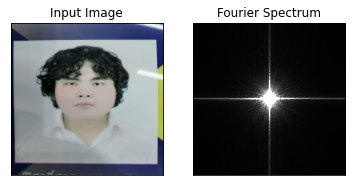

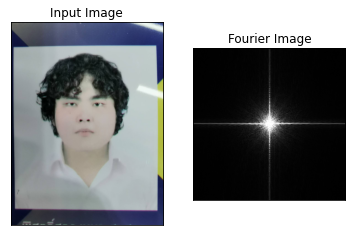

In [18]:
a = ('C:/testcam/datatest/fakerepic/170906.jpg')
convertpic()

In [2]:
from yolort.models import yolov5s

# Load model
model = yolov5s(pretrained=True, score_thresh=0.45)
model.eval()

# Perform inference on an image file
predictions = model.predict("bus.jpg")
# Perform inference on a list of image files
predictions = model.predict(["bus.jpg", "zidane.jpg"])

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
from yolort.models import YOLOv5

# Download checkpoint from https://github.com/ultralytics/yolov5/releases/download/v6.0/yolov5s.pt
ckpt_path_from_ultralytics = "yolov5s.pt"
model = YOLOv5.load_from_yolov5(ckpt_path_from_ultralytics, score_thresh=0.25)

model.eval()
img_path = "bus.jpg"
predictions = model.predict(img_path)

In [6]:
from yolort.runtime import PredictorORT

# Load the serialized ONNX model
engine_path = "yolov5n6.onnx"
y_runtime = PredictorORT(engine_path, device="cpu")

# Perform inference on an image file
predictions = y_runtime.predict("bus.jpg")

RuntimeError: yolort.runtime.y_onnxruntime._set_providers requires module: onnxruntime

In [2]:
import cv2
import torch

from yolort.utils import Visualizer, get_image_from_url, read_image_to_tensor
from yolort.v5.utils.downloads import safe_download

In [5]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
img_source = "https://huggingface.co/spaces/zhiqwang/assets/resolve/main/bus.jpg"
# img_source = "https://huggingface.co/spaces/zhiqwang/assets/resolve/main/zidane.jpg"
img_raw = get_image_from_url(img_source)
img = read_image_to_tensor(img_raw)
img = img.to(device)

images = [img]

In [7]:
score_thresh = 0.55
stride = 64
img_h, img_w = 640, 640

In [10]:
from yolort.models import yolov5n6

In [11]:
model = yolov5n6(pretrained=True, score_thresh=score_thresh, size=(img_h, img_w))

In [12]:
model = model.eval()
model = model.to(device)

In [13]:
# Perform inference on an image tensor
model_out = model(images)

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [14]:
model_out[0]['boxes'].cpu().detach()

tensor([[ 32.31726, 225.15979, 811.48334, 740.91052],
        [ 50.41118, 387.44901, 241.53337, 897.63446],
        [219.03638, 386.11276, 345.77243, 869.04602],
        [678.06140, 374.63916, 809.80615, 874.82538]])

In [15]:
model_out[0]['scores'].cpu().detach()

tensor([0.88245, 0.84473, 0.72631, 0.70092])

In [16]:
model_out[0]['labels'].cpu().detach()

tensor([5, 0, 0, 0])

In [17]:
# label_path = "https://raw.githubusercontent.com/zhiqwang/yolov5-rt-stack/main/notebooks/assets/coco.names"
label_source = "https://huggingface.co/spaces/zhiqwang/assets/resolve/main/coco.names"
label_path = label_source.split("/")[-1]
safe_download(label_path, label_source)

  0%|          | 0.00/621 [00:00<?, ?B/s]

In [18]:
v = Visualizer(img_raw, metalabels=label_path)
v.draw_instance_predictions(model_out[0])
v.imshow(scale=0.5)

TypeError: control character 'delimiter' cannot be a newline (`\r` or `\n`).

In [19]:
# TorchScript export
print(f'Starting TorchScript export with torch {torch.__version__}...')
export_script_name = 'be650.torchscript.pt'  # filename

Starting TorchScript export with torch 1.12.1+cu116...


In [20]:
model_script = torch.jit.script(model)
model_script.eval()
model_script = model_script.to(device)

In [21]:
# Save the scripted model file for subsequent use (Optional)
model_script.save(export_script_name)

In [22]:
out = model(images)
out_script = model_script(images)

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\module.py:1130: UserWarning: torch::jit::fuser::cuda::`anonymous-namespace'::profileViewSize::<lambda_a23c1ce0e3e0dd1e2a01ac16737f476f>::()::<lambda_9cd707c76c0c6c8689d9eaeb39aee06f>::operator () sees varying value in profiling, ignoring and this should be handled by GUARD logic (Triggered internally at  ..\torch\csrc\jit\codegen\cuda\parser.cpp:3515.)
  return forward_call(*input, **kwargs)
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\yolort\models\yolo.py:179: UserWarning: YOLO always returns a (Losses, Detections) tuple in scripting.
  warnings.warn("YOLO always returns a (Losses, Detections) tuple in scripting.")
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\yolort\models\yolov5.py:180: UserWarning: YOLOv5 always returns a (Losses, Detections) tuple in scripting.
  warnings.warn("YOLOv5 always returns a (Losses, Detections) 

In [23]:
for k, v in out[0].items():
    torch.testing.assert_allclose(out_script[1][0][k], v, rtol=1e-07, atol=1e-09)

print("Exported model has been tested with libtorch, and the result looks good!")

Exported model has been tested with libtorch, and the result looks good!


c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\testing\_deprecated.py:35: FutureWarning: torch.testing.assert_allclose() is deprecated since 1.12 and will be removed in 1.14. Use torch.testing.assert_close() instead. For detailed upgrade instructions see https://github.com/pytorch/pytorch/issues/61844.
  warnings.warn(msg, FutureWarning)


In [24]:
%%timeit
with torch.no_grad():
    out = model(images)

16.2 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
# Dummy run once for torchscript
with torch.no_grad():
    out_script = model_script(images)

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\module.py:1130: UserWarning: FALLBACK path has been taken inside: torch::jit::fuser::cuda::runCudaFusionGroup. This is an indication that codegen Failed for some reason.
To debug try disable codegen fallback path via setting the env variable `export PYTORCH_NVFUSER_DISABLE=fallback`
 (Triggered internally at  ..\torch\csrc\jit\codegen\cuda\manager.cpp:334.)
  return forward_call(*input, **kwargs)


In [26]:
%%timeit
with torch.no_grad():
    out_script = model_script(images)

41.6 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
